In [2]:
!pip install folium
!pip install seaborn
!pip install matplotlib
!pip install mysql-connector-python


In [3]:
import pandas as pd
import mysql.connector as msql # Now you should be able to import this module
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as  tick
import folium
import warnings
import credentials as cred

# Database Connection

In [4]:
try:
    conn = msql.connect(host = cred.host, database = 'creditcard_capstone', 
                        user = cred.user, password = cred.password)
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
except msql.Error as e:
    print('Error while connecting to MySQL',e)

You're connected to database:  ('creditcard_capstone',)


### Highest Number of transactions

In [5]:
transaction_type = ("SELECT TRANSACTION_TYPE, count(TRANSACTION_TYPE) "
                    "FROM cdw_sapp_credit_card "
                    "GROUP BY TRANSACTION_TYPE "
                    "ORDER BY TRANSACTION_TYPE")
cursor.execute(transaction_type)
transactions = cursor.fetchall()  
transaction_type_df = pd.DataFrame(transactions)
transaction_type_df.head()
transaction_type_df = transaction_type_df.sort_values(1, ascending=False)
print(transaction_type_df.head())
print(transaction_type_df.to_string(index=False))

               0     1
0          Bills  6861
5     Healthcare  6723
6           Test  6683
1      Education  6638
2  Entertainment  6635
            0    1
        Bills 6861
   Healthcare 6723
         Test 6683
    Education 6638
Entertainment 6635
          Gas 6605
      Grocery 6549


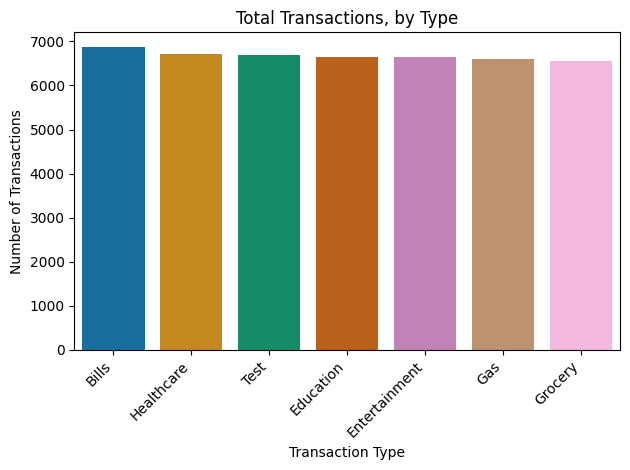

In [6]:
sns.barplot(x=transaction_type_df.iloc[:,0], 
            y=transaction_type_df.iloc[:,1], 
            hue=transaction_type_df.iloc[:,0],  # Add this line
            palette='colorblind',
            legend=False)  # Add this line

# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45, ha='right')  # 'ha' parameter added for better alignment

plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title("Total Transactions, by Type")
plt.tight_layout()  # This ensures that labels don't get cut off
plt.show()

### The plot shows that "Bills" are the highest number of transactions. All of the categores visibly appear very similar. To improve on this, the figure size will be increased and the scale wil be adjusted to a y-value factor of between .9 and 1.1. After this transformation, the categorical differences are more discernible.

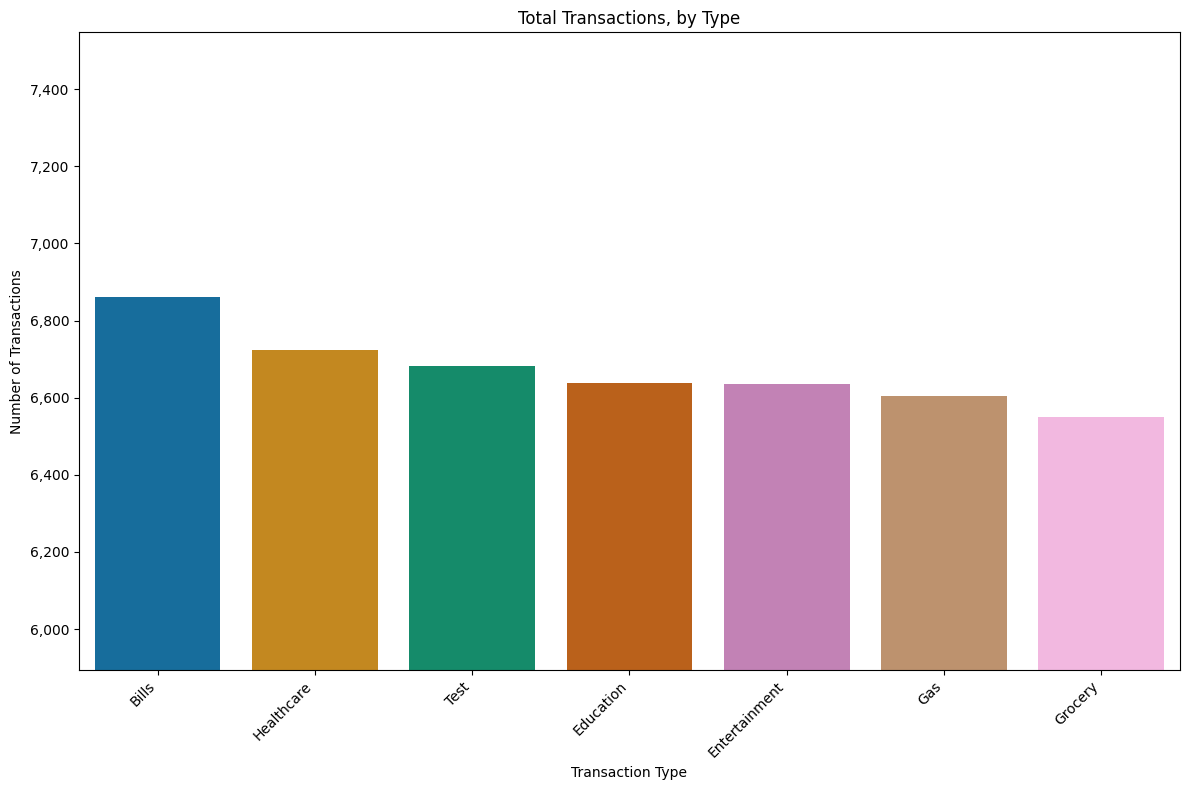

In [7]:
plt.figure(figsize=(12, 8))  # Adjust figure size

sns.barplot(x=transaction_type_df.iloc[:,0], 
            y=transaction_type_df.iloc[:,1], 
            hue=transaction_type_df.iloc[:,0],
            palette='colorblind',
            legend=False)

# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45, ha='right')

plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title("Total Transactions, by Type")

# Adjust y-axis
y_min = transaction_type_df.iloc[:,1].min() * 0.9
y_max = transaction_type_df.iloc[:,1].max() * 1.1
plt.ylim(y_min, y_max)


# Add commas to y-axis labels for readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

## Top 10 states with the highest number of customers.

In [8]:
state_counts_sql=('''SELECT CUST_STATE, COUNT(CUST_STATE) as Count 
                FROM cdw_sapp_customer
                GROUP BY CUST_STATE
                ORDER BY Count DESC''')
cursor.execute(state_counts_sql)   #cursor was assigned in the connect_sql() function
state_results = cursor.fetchall()

customer_states = []
state_counts = []

for row in state_results:
    customer_states.append(row[0])
    state_counts.append(row[1]) 

In [9]:
state_counts_sql = '''SELECT CUST_STATE, COUNT(CUST_STATE) as Count 
                FROM cdw_sapp_customer
                GROUP BY CUST_STATE
                ORDER BY Count DESC'''
cursor.execute(state_counts_sql)   #cursor was assigned in the connect_sql() function
state_results = cursor.fetchall()

# Print header
print("State | Count")
print("--------------")

# Print each row
for row in state_results:
    state = row[0]
    count = row[1]
    print(f"{state:5} | {count:5}")

State | Count
--------------
NY    |    96
GA    |    73
PA    |    72
FL    |    64
IL    |    58
NJ    |    53
MD    |    50
CA    |    45
OH    |    44
MI    |    44
VA    |    39
NC    |    37
TX    |    33
MA    |    33
SC    |    30
WI    |    29
MN    |    28
MS    |    24
IA    |    21
KY    |    17
WA    |    16
CT    |    14
IN    |    13
MT    |     9
AR    |     5
AL    |     5


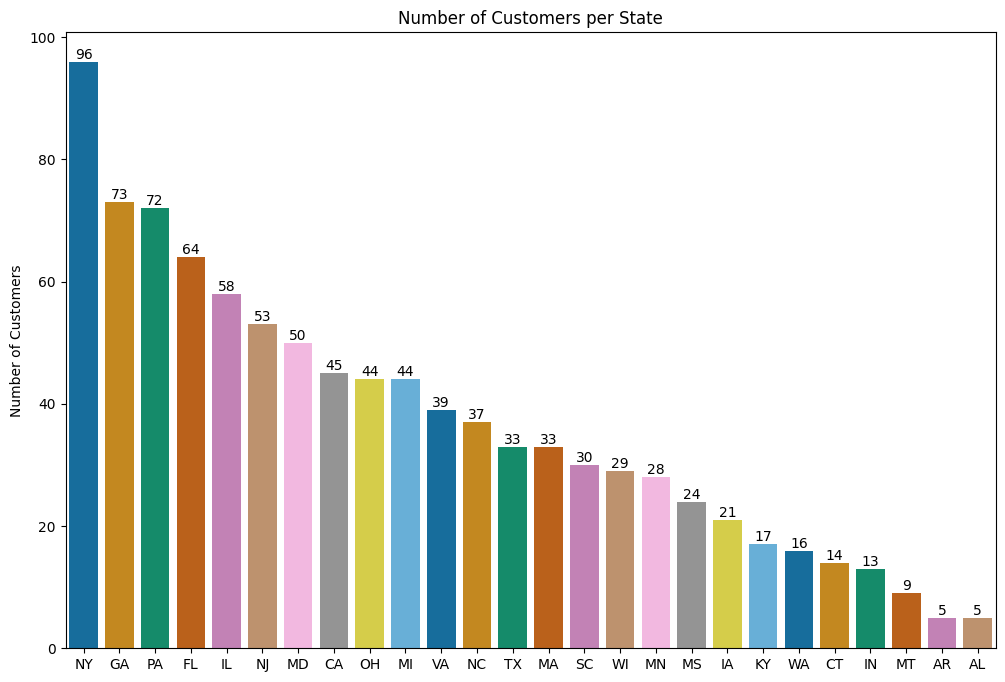

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_states, y=state_counts, hue= customer_states, palette='colorblind')
# Add the actual value to the top of each bar
for i, v in enumerate(state_counts):
    plt.annotate(str(v), (i, v), ha='center', va='bottom')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per State')
plt.show()

### Additional formatting will make the visualization better.

Top 10 States by Customer Count
State | Count
--------------
NY    |    96
GA    |    73
PA    |    72
FL    |    64
IL    |    58
NJ    |    53
MD    |    50
CA    |    45
OH    |    44
MI    |    44


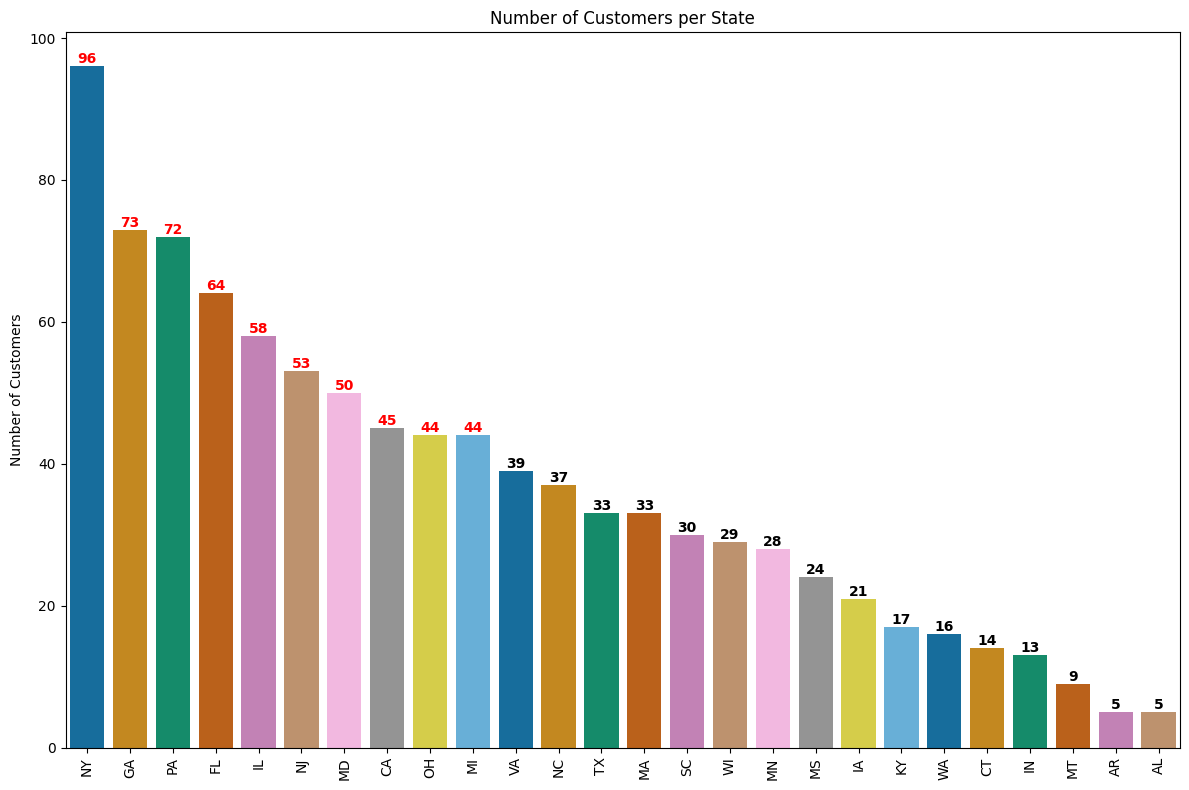

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort the data by count in descending order
sorted_data = sorted(zip(customer_states, state_counts), key=lambda x: x[1], reverse=True)
sorted_states, sorted_counts = zip(*sorted_data)


# Print the top 10 states
print("Top 10 States by Customer Count")
print("State | Count")
print("--------------")

for state, count in list(zip(sorted_states, sorted_counts))[:10]:
    print(f"{state:5} | {count:5}")

#Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_states, y=sorted_counts, hue=sorted_states, palette='colorblind')

# Determine the top 10 states
top_10_count = sorted_counts[9]  # Count of the 10th state

# Add labels to the bars
for i, v in enumerate(sorted_counts):
    if v >= top_10_count:  # If this state is in the top 10
        color = 'red'  # You can change this to any color you prefer
    else:
        color = 'black'
    
    plt.annotate(str(v), (i, v), ha='center', va='bottom', color=color, fontweight='bold')

plt.ylabel('Number of Customers')
plt.title('Number of Customers per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

### New York has the most customers. The top 10 states have labels in red.

In [12]:
# Create the DataFrame
state_results_df = pd.DataFrame(state_results, columns=['State', 'Customers'])


print(state_results_df.head().to_string(index=False))

State  Customers
   NY         96
   GA         73
   PA         72
   FL         64
   IL         58


In [13]:
import json

with open(r"C:\Users\chito\Developer\Capstone_350\Raw_Data\archive\us-states.json") as map_file:
    us_states = json.load(map_file)

# Check the properties of the first feature
print(us_states['features'][0]['properties'].keys())

dict_keys(['name'])


### *Source of geojson file is (kaggle datasets download -d pompelmo/usa-states-geojson)

In [14]:
# import geojson

# with open(r"C:\Users\chito\Developer\Capstone_350\Raw_Data\archive\us-states.json") as map_file:
#     geojson_data = geojson.load(map_file)

# if geojson_data.is_valid:
#     print("The GeoJSON file is valid.")
# else:
#     print("The GeoJSON file is not valid.")

In [15]:
state_names_in_geojson = [feature['properties']['name'] for feature in us_states['features']]
print(state_names_in_geojson)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [16]:
print(state_results_df['State'].tolist())

['NY', 'GA', 'PA', 'FL', 'IL', 'NJ', 'MD', 'CA', 'OH', 'MI', 'VA', 'NC', 'TX', 'MA', 'SC', 'WI', 'MN', 'MS', 'IA', 'KY', 'WA', 'CT', 'IN', 'MT', 'AR', 'AL']


In [17]:
!pip install us
import us  # You might need to install this: pip install us

# Create a mapping of state abbreviations to full names
state_abbr_to_name = {state.abbr: state.name for state in us.states.STATES}

# Update the DataFrame
state_results_df['State'] = state_results_df['State'].map(state_abbr_to_name)

# Now create the map
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

folium.Choropleth(
    geo_data=us_states,
    name='choropleth',
    data=state_results_df,
    columns=['State', 'Customers'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Customers'
).add_to(us_map)

folium.LayerControl().add_to(us_map)

us_map

In [19]:
us_map.save('choropleth.html')

## The top 10 customers with the highest transaction amounts (in dollar value) by SSN

In [ ]:

import pandas as pd

cust_transactions_sql = '''
    SELECT CUST_SSN as SSN, count(TRANSACTION_VALUE) as Quantity
    FROM cdw_sapp_credit_card
    GROUP BY CUST_SSN
    ORDER BY Quantity DESC
    LIMIT 10
'''

customer_transactions_df = pd.read_sql(cust_transactions_sql, conn)
customer_transactions_df.head()

C:\Users\chito\AppData\Local\Temp\ipykernel_1956\720504613.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_transactions_df = pd.read_sql(cust_transactions_sql, conn)


,SSN,Quantity
0,123451357,99
1,123453831,99
2,123456678,99
3,123451701,99
4,123457070,99


In [ ]:
cust_highest_sql=('''SELECT CUST_SSN as SSN,sum(TRANSACTION_VALUE) as Total
                FROM cdw_sapp_credit_card
                GROUP BY CUST_SSN 
                ORDER BY Total DESC
                LIMIT 10''')

cursor.execute(cust_highest_sql)   #cursor was assigned in the connect_sql() function
customer_highest = cursor.fetchall()

cust_ssn = []
trans_total = []

for row in customer_highest:
    cust_ssn.append(row[0])
    trans_total.append(row[1]) 

print(customer_highest)
customer_highest_df = pd.read_sql(cust_highest_sql, conn)
customer_highest_df.head(11)

[(123451125, 5633.0700000000015), (123452783, 5548.140000000001), (123453486, 5476.079999999999), (123458668, 5314.970000000003), (123456678, 5261.030000000001), (123452026, 5241.18), (123452518, 5223.959999999999), (123454933, 5203.080000000001), (123457547, 5149.75), (123452085, 5133.290000000002)]


C:\Users\chito\AppData\Local\Temp\ipykernel_1956\1590772760.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_highest_df = pd.read_sql(cust_highest_sql, conn)


,SSN,Total
0,123451125,5633.07
1,123452783,5548.14
2,123453486,5476.08
3,123458668,5314.97
4,123456678,5261.03
5,123452026,5241.18
6,123452518,5223.96
7,123454933,5203.08
8,123457547,5149.75
9,123452085,5133.29


C:\Users\chito\AppData\Local\Temp\ipykernel_1956\1614318059.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_highest_df, x=customer_highest_df.index, y='Total', palette="colorblind", order=customer_highest_df.index)


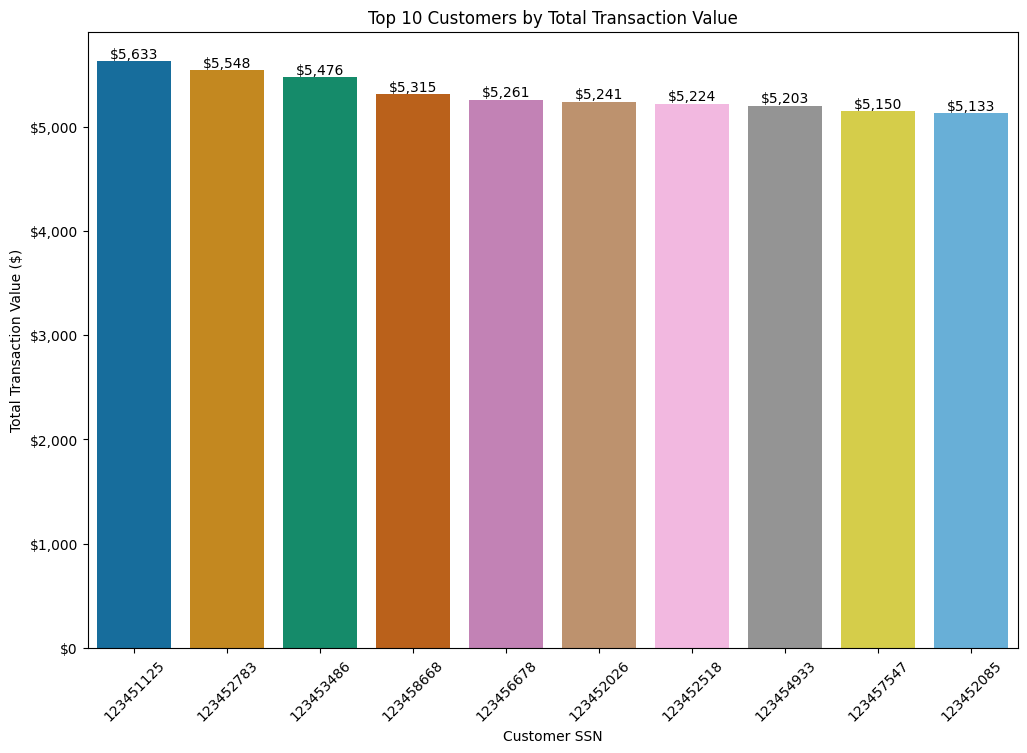

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ... (Your SQL query and data fetching code) ...

# Assuming 'SSN' is already the index from the pd.read_sql() output
# No need to set it as the index again: customer_highest_df.set_index('SSN', inplace=True)

plt.figure(figsize=(12, 8))  

sns.barplot(data=customer_highest_df, x=customer_highest_df.index, y='Total', palette="colorblind", order=customer_highest_df.index)

# Format y-axis labels as dollars
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')) 

plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Customer SSN')
plt.ylabel('Total Transaction Value ($)')
plt.xticks(rotation=45) 

# Add value labels
for index, value in enumerate(customer_highest_df['Total']):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom')

plt.show()
